In [19]:
import numpy as np
from scipy.integrate import quad
import scipy.constants as const
import matplotlib.pyplot as plt

In [20]:
# Values
kpc = 3.086e+19
M_sol = 1.9884e30
L = 50 * kpc
V_c = 220e3
M = .01 * M_sol
R_0 = 8.5 * kpc

# Constants
c = const.c
G = const.G

In [21]:
# Constant multiplier:
#m =  32 * L / ( V_c**2 * 86400**2 * 0.00273973**2 * M)
m =  32 * L / ( V_c**2 * M)

#def m(t):
#    return 32 * L / (t**4 * V_c**2 * 86400**2 * 0.00273973**2 * M)

# Einstein Radius
def e(x):
    return np.sqrt(4 * G * M * L * x * (1-x) / c**2)

# Inside last exp
k = 16 * G * M * L / (c**2 * V_c**2 * 86400**2)

# Densities

# Bulge
def r1(x):
    m1 = 1.55e10 * M_sol
    rb = 0.70 * kpc
    return 2 * m1 * rb / (L * x * (rb + L *x)**3)

# Disk
def r2(x):
    m2 = 3.65e10 * M_sol
    l = 2.35 * kpc
    H = 0.14 * kpc
    return m2 * np.exp(-L * x / l)  * np.exp(- 2 *e (x) / H) / (l**2 * H)

# Gas
def r3(x):
    m3 = 0.82e10 * M_sol
    rg = 18.14 * kpc
    zd = 0.52 * kpc
    return m3 * np.exp(-L * x / rg) * np.exp(- 2 *e (x) / zd) / (rg**2 * zd)

# Halo
def r4(x):
    rho_0 = 0.01992e9 * M_sol  / kpc**3
    rh = 11.41 * kpc
    n= 0.43
    return rho_0 * np.exp(-(L * x / rh)**(1/n))

# Density
def r(x):
    return r4(x)

# Exponent
def exp(x, t):
    return np.exp(-(k * x * (1 - x) / t**2))

# Integrand
def int(x, t):
    return r(x) * e(x)**4 * exp(x, t) / t

In [22]:
t_values = np.arange(2.5, 250, 2.5)

diff_rates = []
errors = []
results = []

for t in t_values:
    result, error = quad(int, R_0/L, 1, args=(t,))
    
    diff_rat =  m * result 
    results.append(diff_rat)
    
results = np.array(results)

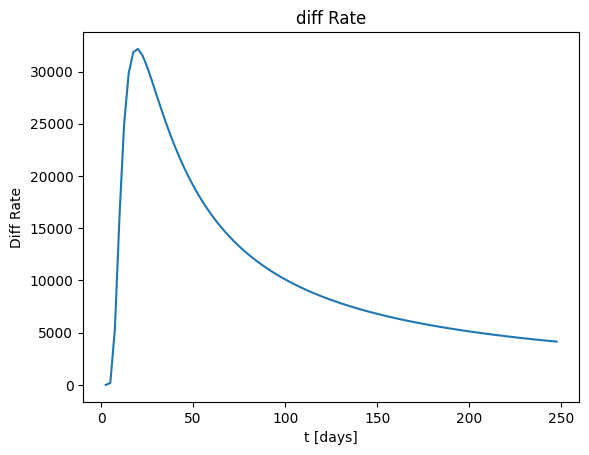

In [23]:
# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(t_values, results)

'''
# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=0.5)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')
'''

# Set labels
ax.set_xlabel('t [days]')
ax.set_ylabel('Diff Rate')
ax.set_title('diff Rate')

# Show the grid
ax.grid(False, which='both')

# Display the plot
plt.show()

In [24]:
print(4 * G * M * L / c**2)

9.11368449323012e+22
